In [5]:
# PREPARACION DE AMBIENTE
# ----------------------------------------------------------------------------------------------------
# Importaciones de python
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import plotly.express as px
import math
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.colors import sequential
import argparse
import json
Greens = sequential.Blues

# Al ejecutar el archivo se debe de pasar el argumento --config /ruta/a/archivo/de/crecenciales.json
# parser = argparse.ArgumentParser()
# parser.add_argument("--config", help="Ruta hacia archivo de configuracion")
# args = parser.parse_args()
# Leemos las credenciales de la ruta especificada

with open("/home/antonio/Documents/Research/Transtat/spark-rita/creds_temp.json") as json_file:
    config = json.load(json_file)
user = config["user"] # Usuario de mysql
password = config["password"] # Password de mysql
database = config["database"] # Base de datos en la que almaceno resultados y tiempo de ejecucion
db_url = config["db_url"] # URL de la base de datos
# ----------------------------------------------------------------------------------------------------


# DEFINICION DE FUNCIONES
# ----------------------------------------------------------------------------------------------------
def update_graph():
    db_connection_str = 'mysql+pymysql://' + user + ':' + password + '@localhost:3306/' + database # String de conexion a MySQL
    db_connection = create_engine(db_connection_str) # Conectamos con la base de datos de MySQL

    tiempo_spark = pd.read_sql('SELECT * FROM registro_de_tiempo_spark ORDER BY insertion_ts DESC LIMIT 400', con=db_connection) # Lectura de datos de demoras diarias
    tiempo_dask = pd.read_sql('SELECT * FROM registro_de_tiempo_dask ORDER BY insertion_ts DESC LIMIT 400', con=db_connection) # Lectura de datos de demoras diarias
    return tiempo_spark, tiempo_dask

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

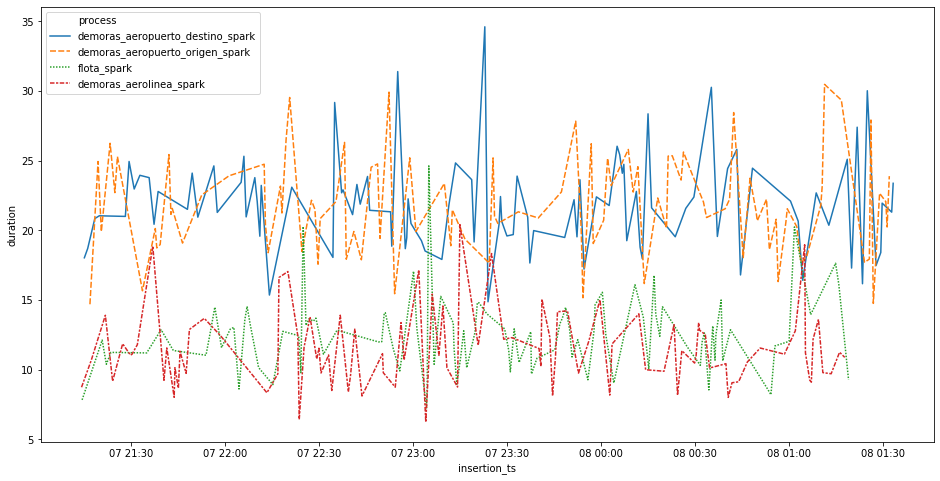

In [7]:
tiempo_spark, tiempo_dask = update_graph()
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="insertion_ts", y="duration",
             hue="process",
             ax=ax,
             data=tiempo_spark, style='process')

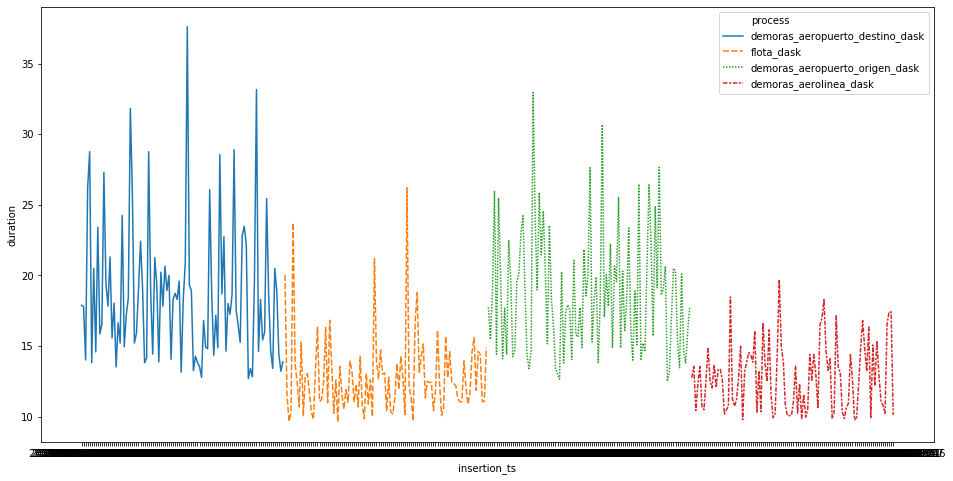

In [8]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="insertion_ts", y="duration",
             hue="process",
             ax=ax,
             data=tiempo_dask, style='process')